## NNs with TF and Keras

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt


In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train, y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

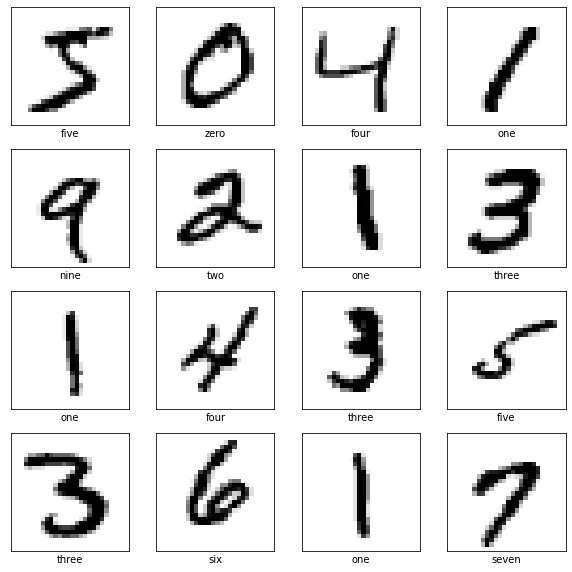

In [24]:
# Images Class Names:
class_names = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eigth", "nine", "ten"]
plt.figure(figsize=(10,10))
for img in range(16):
    plt.subplot(4,4, img+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(x_train[img], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[img]])
plt.show()

In [28]:
# Prepare Data. Normalize x_train, one hot encode y laBEL

x_train = (x_train / 255).astype("float32")
y_train = to_categorical(y_train)

In [34]:
# create the nn model
model = tf.keras.Sequential()
model.add(Flatten(input_shape = (28,28))) # primeira camada que converte os dados 3D para 2D
model.add(Dense(128, activation = "relu"))
model.add(Dense(124, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [35]:
# Compilation and optmization
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
# train
model.fit(x= x_train, y= y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.2301 - accuracy: 0.9317
Epoch 2/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.0967 - accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.0679 - accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.0524 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.0406 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 2s 821us/step - loss: 0.0337 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.0276 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 2s 807us/step - loss: 0.0236 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 2s 809us/step - loss: 0.0215 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 2s 956u

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 124)               15996     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1250      
Total params: 117,726
Trainable params: 117,726
Non-trainable params: 0
_________________________________________________________________


In [38]:
# test the network
# prepare the test data
x_test = (x_test / 255).astype("float32")
y_test = to_categorical(y_test)

In [39]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000, 10))

In [40]:
y_hat = model.predict(x_test)
y_hat # probavilidade de cada classe

array([[1.1948986e-09, 1.1951879e-13, 2.1369063e-11, ..., 9.9999964e-01,
        2.3620361e-10, 3.4689620e-07],
       [9.0158762e-13, 1.4062938e-11, 1.0000000e+00, ..., 1.3964552e-18,
        1.8384275e-13, 9.9273560e-18],
       [1.3964775e-07, 9.9975389e-01, 1.3653127e-05, ..., 2.0209838e-04,
        2.4111074e-05, 1.0156950e-08],
       ...,
       [2.9273780e-17, 1.7411510e-15, 2.1857644e-18, ..., 2.7559341e-10,
        5.1826043e-11, 1.2901625e-08],
       [4.7542011e-15, 2.9704851e-24, 6.7410814e-26, ..., 6.6836439e-20,
        2.8518598e-12, 3.9123284e-21],
       [1.2816046e-09, 2.0990654e-17, 3.6082457e-16, ..., 1.4055300e-18,
        7.1295105e-12, 5.4246208e-16]], dtype=float32)

In [45]:
# model evaluate
evaluation = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0980 - accuracy: 0.9770


In [47]:
evaluation

[0.09799356758594513, 0.9769999980926514]